## Lesson: Curate a Dataset

In [2]:
path = "/home/isaac/UdacityDL/SentiAna/Trask/"

In [17]:
## Open review data
with open(path+"reviews.txt", "r+") as file:
    review_data = file.readlines()
    file.close()
len(review_data)

25000

In [22]:
## Check data first, looks like there are something unnecessary \n
review_data[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   \n'

In [23]:
## To remove "\n"
review_data[0][:-1]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [29]:
## apply to all the dataset
review_data = list(map(lambda x: x[:-1], review_data)) ## without list, map will not return proper values
review_data[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn '

In [31]:
## Open label data, similarly prepare for label data
with open(path+"labels.txt", "r+") as file:
    label_data = file.readlines()
    file.close()
len(label_data)
label_data = list(map(lambda x: x[:-1].upper(), label_data))
label_data[0]

'POSITIVE'

In [34]:
def pretty_print_review_and_label(i):
    print(label_data[i] + "\t:\t" + review_data[i][:80] + "...") 
    ##print out positive/negative and first 80 char of the review

## Lesson: Develop a Predictive Theory

In [36]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effect...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woma...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


## Project 1: Quick Theory Validation
- **My Solution**

1. Create two dictionaries, positive vs. negative
2. Count the word appearances in each dictionary: positive +1, negative -1, if the final sum result is greater than 0, it will be positive, otherwise negative. If zero, it will be neutral.

In [41]:
## Load two libraries
from collections import Counter
import numpy as np

In [44]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()
## Initialization

In [46]:
for i in range(len(review_data)):
    if(label_data[i] == "POSITIVE"):
        for word in review_data[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1 
    else:
        for word in review_data[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [47]:
positive_counts.most_common() 
## doesn't tell the whole story, not interested in the most common words. 
## interested in the word mostly positive vs. negative
## Next step is to normalize the results

[('', 520295),
 ('the', 173372),
 ('.', 150405),
 ('and', 89723),
 ('a', 83675),
 ('of', 76761),
 ('to', 66785),
 ('is', 57217),
 ('in', 50205),
 ('br', 48981),
 ('it', 47566),
 ('i', 41123),
 ('that', 35587),
 ('this', 35010),
 ('s', 33822),
 ('as', 26310),
 ('with', 23244),
 ('for', 22403),
 ('was', 21913),
 ('but', 20822),
 ('film', 20750),
 ('movie', 18837),
 ('his', 17227),
 ('on', 17068),
 ('you', 16604),
 ('he', 16295),
 ('are', 14801),
 ('not', 14263),
 ('t', 13753),
 ('one', 13570),
 ('have', 12580),
 ('be', 12405),
 ('by', 11991),
 ('all', 11885),
 ('who', 11464),
 ('an', 11296),
 ('at', 11229),
 ('from', 10753),
 ('her', 10482),
 ('they', 9893),
 ('has', 9185),
 ('so', 9148),
 ('like', 9035),
 ('very', 8305),
 ('about', 8302),
 ('out', 8046),
 ('there', 8036),
 ('she', 7780),
 ('what', 7735),
 ('or', 7731),
 ('good', 7654),
 ('more', 7482),
 ('when', 7455),
 ('some', 7440),
 ('if', 7284),
 ('just', 7152),
 ('can', 6989),
 ('story', 6731),
 ('my', 6488),
 ('time', 6418),
 ('g

In [48]:
negative_counts.most_common()

[('', 532213),
 ('the', 163433),
 ('.', 157811),
 ('a', 79346),
 ('and', 74385),
 ('to', 68983),
 ('of', 68942),
 ('br', 52407),
 ('is', 50041),
 ('it', 47927),
 ('i', 47264),
 ('in', 43744),
 ('this', 40780),
 ('that', 37551),
 ('s', 31548),
 ('was', 26285),
 ('movie', 24656),
 ('for', 21924),
 ('but', 21781),
 ('with', 20866),
 ('as', 20626),
 ('t', 20376),
 ('film', 19022),
 ('you', 17470),
 ('on', 17320),
 ('not', 16337),
 ('have', 15138),
 ('are', 14622),
 ('be', 14529),
 ('he', 13872),
 ('they', 13011),
 ('one', 12978),
 ('at', 12271),
 ('his', 12146),
 ('all', 11972),
 ('so', 11452),
 ('like', 11232),
 ('there', 10745),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10270),
 ('who', 9969),
 ('from', 9639),
 ('if', 9518),
 ('about', 9052),
 ('out', 8939),
 ('what', 8417),
 ('some', 8305),
 ('no', 8171),
 ('her', 7979),
 ('even', 7686),
 ('can', 7646),
 ('has', 7600),
 ('good', 7384),
 ('bad', 7328),
 ('would', 7031),
 ('up', 6945),
 ('only', 6759),
 ('when', 6726),
 ('

In [59]:
## Create positive negative ration
pos_neg_ratios = Counter()

for term, count in list(total_counts.most_common()):
    if(count > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term] + 1)
        pos_neg_ratios[term] = pos_neg_ratio

for word, ratio in pos_neg_ratios.most_common():
    if(ratio>1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1/(ratio+0.01)))

In [60]:
pos_neg_ratios.most_common()[0:30]

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1441522786722644),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.59338729278207),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('recommende', 2.217225244042889),
 ('astaire', 2.1400661634962708),
 ('perfection', 2.120263536200091),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('lily', 1.9810014688665833),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.8883863049171268),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('refreshing', 1.8382794848629478),
 ('breathtaking', 1.834319083646851),
 ('flynn', 1.7996646487351682),
 ('delightful', 1.7874768074360541),
 ('beautifully', 1.7784436932522829),
 ('andrews', 1.7764919970972666),
 ('home

In [61]:
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0720595174326659),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5510464522925456),
 ('waste', -2.4944860649829286),
 ('blah', -2.4934345291180464),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3393207754450556),
 ('atrocious', -2.3087493041630114),
 ('prom', -2.2685900877413605),
 ('redeeming', -2.263751651516682),
 ('drivel', -2.2154986437473334),
 ('lousy', -2.19813408171906),
 ('worst', -2.1919840953913035),
 ('laughable', -2.1677164747499282),
 ('poorly', -2.1297694349828267),
 ('awful', -2.1218988595408219),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -1.9895235947380818),
 ('boredom', -1.9166645809588516),
 ('miserably', -1.9131499212248517),
 ('uninspired', -1.9131499212248517),
 ('uninteresting', -1.9110090970465483),
 ('lame', -1.9004693704747115),
 ('insult', -1.8935228587050

By just checking the data above, there's a correlation between positive and negative review

## Transforming Text into Numbers

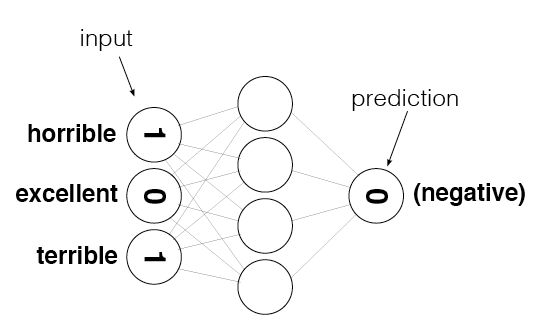

In [66]:
from IPython.display import Image
review = "This was a horrible, terrible movie."
Image(filename = path + "sentiment_network.png")

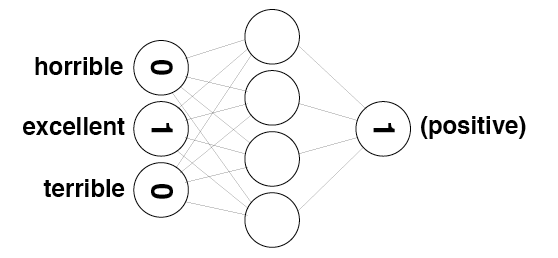

In [67]:
review = "The movie was excellent."
Image(filename = path + "sentiment_network_pos.png")

## Project 2
Convert the input and output of the dataset into numbers.
1. Convert each string into a vector
2. Each label into a 0 or 1

In [92]:
## Get the word count total
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

76958


In [93]:
## Initialize layer zero
layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [94]:
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'possibl': 38331,
 'scrubbers': 1,
 'wishing': 2,
 'churned': 3,
 'cov': 4,
 'reservist': 6,
 'neighborly': 7,
 'fretted': 75786,
 'spacemen': 9,
 'nunnery': 10,
 'wittier': 14,
 'lorri': 17,
 'kazuo': 16,
 'surmounts': 15,
 'gulp': 18,
 'minutely': 19,
 'peeling': 20,
 'hampden': 23,
 'nalo': 28780,
 'hugon': 12754,
 'sampled': 24,
 'hunchbacked': 29,
 'garsh': 27,
 'pontificating': 30,
 'unamused': 31,
 'cornerstones': 32,
 'dudikoff': 33,
 'metephorically': 34,
 'kinekor': 35,
 'chauvinist': 51187,
 'jenny': 38,
 'townsell': 37,
 'befittingly': 39,
 'hallucinatory': 51188,
 'ruse': 42,
 'flair': 43,
 'celebi': 44,
 'apes': 45,
 'moviejust': 46,
 'lulls': 47,
 'piovani': 48,
 'uselessly': 49,
 'seductive': 50,
 'levered': 51,
 'maltreatment': 52,
 'resistant': 53,
 'grafting': 54,
 'vexingly': 56,
 'facially': 57,
 'alexa': 59,
 'petaluma': 8,
 'lolling': 63,
 'palooka': 67136,
 'soapbox': 64,
 'accrued': 65,
 'bad': 66,
 'ruthlessreviews': 69,
 'monochromatic': 68,
 'bombad

In [104]:
## Convert word to index
def update_input_layer(my_review):

    global layer_0
    
    layer_0 *= 0
    for word in my_review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(review_data[0])

In [105]:
layer_0

array([[ 15.,   0.,   0., ...,   0.,   0.,   0.]])

In [106]:
def get_target_for_label(label):
    ##"""Convert a label to `0` or `1`.
    ##Args:
    ##    label(string) - Either "POSITIVE" or "NEGATIVE".
    ##Returns:
    ##    `0` or `1`.
    ##"""
    if label == "POSITIVE":
        return (1)
    elif label == "NEGATIVE":
        return(0)

In [107]:
get_target_for_label(label_data[0])

1

In [108]:
get_target_for_label(label_data[1])

0

## Project 3: Build a Neural Network

In [110]:
import time
import sys
import numpy as np

## Tweak network from before to model this case
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # set random number generator
        np.random.seed(1)
        
        self.pre_process_data(review_data, label_data)
        
        self.init_network(len(self.review_vocab), hidden_nodes, 1, learning_rate)
    
    def pre_process_data(self, review_data, label_data):
        review_vocab = set()
        for review in review_data:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in label_data:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
    
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        ## Set number of nodes in input, hidden, output layers
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        ## Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes ** (-0.5), 
                                            (self.hidden_nodes, self.output_nodes))
        self.learning_rate = learning_rate
        self.layer_0 = np.zeros((1, input_nodes))
    
    def update_input_layer(self, review):
        self.layer_0 *= 0
        for word in review.split(" "):
            if (word in self.word2index.key()):
                self.layer_0[0][self.word2index[word]] += 1
    
    def get_target_for_label(self, label):
        if (label == "POSITIVE"):
            return 1
        else:
            return 0
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self, output):
        return output * (1-output)
    
    def train(self, training_reviews, training_labels):
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        start = time.time()
        
        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]
            
            ## Implement the forward pass
            
            ## Input layer
            self.update_input_layer(review)
            
            ## Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            ## Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            ## Backward pass
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            ## Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            ## Update weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [112]:
mlp = SentimentNetwork(review_data[:-1000],label_data[:-1000], learning_rate=0.1)

In [114]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(review_data[-1000:],label_data[-1000:])

AttributeError: 'dict' object has no attribute 'key'